<a href="https://www.kaggle.com/code/valdinidouglace/data-mining-sentiments-analysis?scriptVersionId=177876251" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# 1-installation et import des packages

In [1]:
#! pip install wordcloud
# ! pip install twepy

In [2]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# 2- import des donnees et analyses primaires

In [3]:
df=pd.read_csv('/kaggle/input/twitter-tweets-sentiment-dataset/Tweets.csv')

In [4]:
df.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


# Exploration des donnees

In [5]:
df.shape

(27481, 4)

In [6]:
df['sentiment'].value_counts()/df.shape[0]

sentiment
neutral     0.404570
positive    0.312288
negative    0.283141
Name: count, dtype: float64

In [7]:
df.isna().sum()

textID           0
text             1
selected_text    1
sentiment        0
dtype: int64

In [8]:
print(df[df.duplicated()])

Empty DataFrame
Columns: [textID, text, selected_text, sentiment]
Index: []


In [9]:
df=df.dropna(axis=0)

In [10]:
df.isna().sum()

textID           0
text             0
selected_text    0
sentiment        0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27480 entries, 0 to 27480
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   textID         27480 non-null  object
 1   text           27480 non-null  object
 2   selected_text  27480 non-null  object
 3   sentiment      27480 non-null  object
dtypes: object(4)
memory usage: 1.0+ MB


# Selection des variables

In [12]:
df_selected=df[['sentiment','text']]

In [13]:
df_select=df_selected

In [14]:
df_selected=df_selected[(df_selected['sentiment']=='positive')|(df_selected['sentiment']=='negative')]

In [15]:
3
df_selected.shape

(16363, 2)

In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
df_selected['sentiment']=LabelEncoder().fit_transform(df_selected['sentiment'])

/tmp/ipykernel_18/1929117442.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['sentiment']=LabelEncoder().fit_transform(df_selected['sentiment'])


In [18]:
df_selected

,sentiment,text
1,0,Sooo SAD I will miss you here in San Diego!!!
2,0,my boss is bullying me...
3,0,what interview! leave me alone
4,0,"Sons of ****, why couldn`t they put them on t..."
6,1,2am feedings for the baby are fun when he is a...
...,...,...
27475,1,enjoy ur night
27476,0,wish we could come see u on Denver husband l...
27477,0,I`ve wondered about rake to. The client has ...
27478,1,Yay good for both of you. Enjoy the break - y...


In [19]:
df_selected['sentiment'].value_counts()/df_selected.shape[0]

sentiment
1    0.524476
0    0.475524
Name: count, dtype: float64

In [20]:
# df_selected=df_selected.sample(n=16000,random_state=42)

In [21]:
tweet_positif=df_selected[df_selected['sentiment']==1]
tweet_negatif=df_selected[df_selected['sentiment']==0]

In [22]:
# fonction pour generer les word cloud qui affichent les mot les plus frequents
def word_cloud_generator(tweets,titre):
    all_text=''.join(tweets)
    word=WordCloud(width=800,height=400,background_color='white').generate(all_text)
    plt.figure(figsize=(10,5))
    plt.imshow(word,interpolation='bilinear')
    plt.title(titre)
    plt.axis('off')
    plt.show()

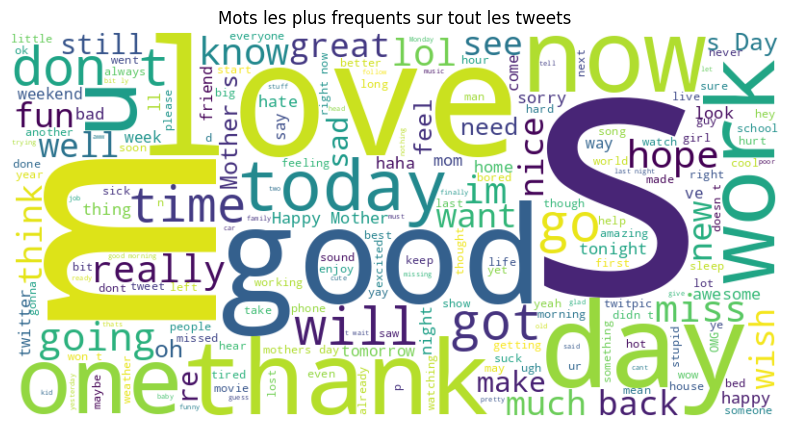

In [23]:
word_cloud_generator(df_selected['text'],'Mots les plus frequents sur tout les tweets')

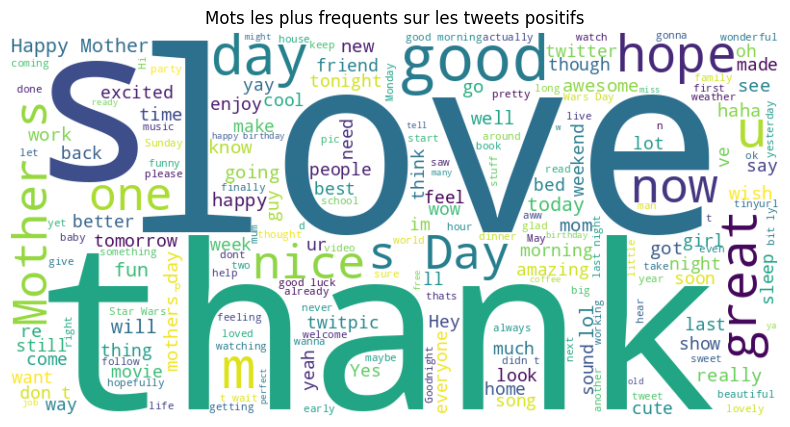

In [24]:
word_cloud_generator(tweet_positif['text'],'Mots les plus frequents sur les tweets positifs')

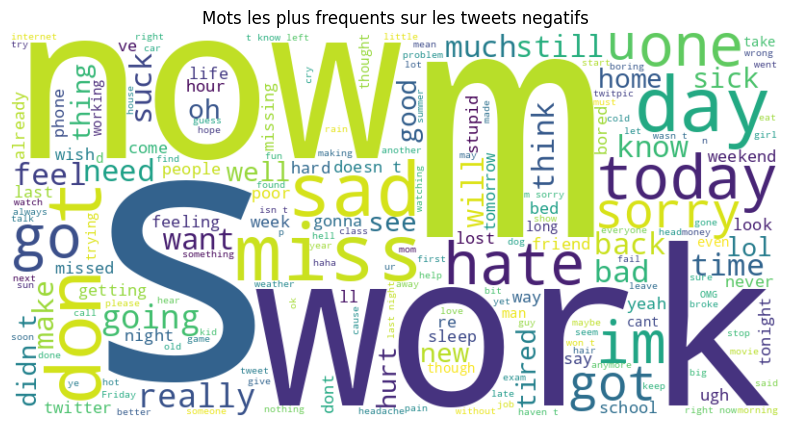

In [25]:
word_cloud_generator(tweet_negatif['text'],'Mots les plus frequents sur les tweets negatifs')

In [26]:
['miss','thank','love','work','','now','really','one','mothers']

['miss', 'thank', 'love', 'work', '', 'now', 'really', 'one', 'mothers']

# 3- traitement des donnees

In [27]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string

In [28]:
nltk.download('/root/nltk_data/wordnet')
#nltk.download('punkt')
#nltk.download('stopwords')
# !pip install google-cloud-translate
# !pip install googletrans
# !pip install transformers

[nltk_data] Error loading /root/nltk_data/wordnet: <urlopen error
[nltk_data]     [Errno -3] Temporary failure in name resolution>


False

In [29]:
def clean_text(text):
    # suppression des caracteres speciaux et des ponctuations
    text=re.sub(r"[^\w\s]","",text)
    text = text.lower()  # Convertit le texte en minuscules
    text = re.sub('\[.*?\]', '', text)  # Supprime le texte entre crochets
    text = re.sub("\\W"," ", text)  # Remplace les non-alphanumériques par des espaces
    text = re.sub('https?://\S+|www\.\S+', '', text)  # Supprime les URLs
    text = re.sub('<.*?>+', '', text)  # Supprime les balises HTML
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)  # Supprime la ponctuation
    text = re.sub('\n', '', text)  # Supprime les nouvelles lignes
    text = re.sub('\w*\d\w*', '', text)  # Supprime les mots contenant des chiffres
    
    # traduction
    
    #Tokenisation
    tokens=word_tokenize(text)
    # lematisation
    #tokens2=[]
    #for i in tokens:
        #lem1=WordNetLemmatizer().lemmatize(i,pos='v')
        #lem2=WordNetLemmatizer().lemmatize(lem1,pos='s')
        #lem=WordNetLemmatizer().lemmatize(lem2,pos='a')
        #tokens2.append(lem)
    #tokens=tokens2
    
    #suppresiion des mots vides
    stop_words=[]
    tokens=[word for word in tokens if word not in stop_words]
    
    #joindre les token en une seul chaine
    cleaned_text=' '.join(tokens)
    
    return cleaned_text

In [30]:
# stopwords.words("english")
tokens=['miss','thank','love','work','','now','really','one','a','runing']
# stop_words=['miss','thank','love','work','','now','really','one','mothers']
# tokens=[word for word in tokens if word not in stop_words]
# tokens    

In [31]:
df_selected['clean_text']=df_selected['text'].apply(clean_text)

/tmp/ipykernel_18/2917576302.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['clean_text']=df_selected['text'].apply(clean_text)


In [32]:
df_selected.head(20)

,sentiment,text,clean_text
1,0,Sooo SAD I will miss you here in San Diego!!!,sooo sad i will miss you here in san diego
2,0,my boss is bullying me...,my boss is bullying me
3,0,what interview! leave me alone,what interview leave me alone
4,0,"Sons of ****, why couldn`t they put them on t...",sons of why couldnt they put them on the relea...
6,1,2am feedings for the baby are fun when he is a...,feedings for the baby are fun when he is all s...
9,1,Journey!? Wow... u just became cooler. hehe....,journey wow u just became cooler hehe is that ...
11,1,I really really like the song Love Story by Ta...,i really really like the song love story by ta...
12,0,My Sharpie is running DANGERously low on ink,my sharpie is running dangerously low on ink
13,0,i want to go to music tonight but i lost my vo...,i want to go to music tonight but i lost my voice
15,0,"Uh oh, I am sunburned",uh oh i am sunburned


In [33]:
tweet_positif=df_selected[df_selected['sentiment']==1]
tweet_negatif=df_selected[df_selected['sentiment']==0]

In [34]:
tweet_negatif

,sentiment,text,clean_text
1,0,Sooo SAD I will miss you here in San Diego!!!,sooo sad i will miss you here in san diego
2,0,my boss is bullying me...,my boss is bullying me
3,0,what interview! leave me alone,what interview leave me alone
4,0,"Sons of ****, why couldn`t they put them on t...",sons of why couldnt they put them on the relea...
12,0,My Sharpie is running DANGERously low on ink,my sharpie is running dangerously low on ink
...,...,...,...
27464,0,rec game....trying not to cry...the pain is to...,rec gametrying not to crythe pain is to muchi ...
27470,0,lol i know and haha..did you fall asleep?? o...,lol i know and hahadid you fall asleep or just...
27472,0,http://twitpic.com/663vr - Wanted to visit the...,wanted to visit the animals but we were too late
27476,0,wish we could come see u on Denver husband l...,wish we could come see u on denver husband los...


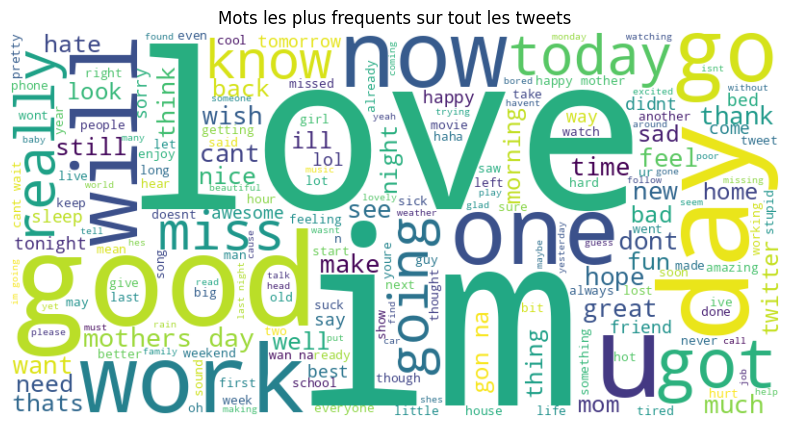

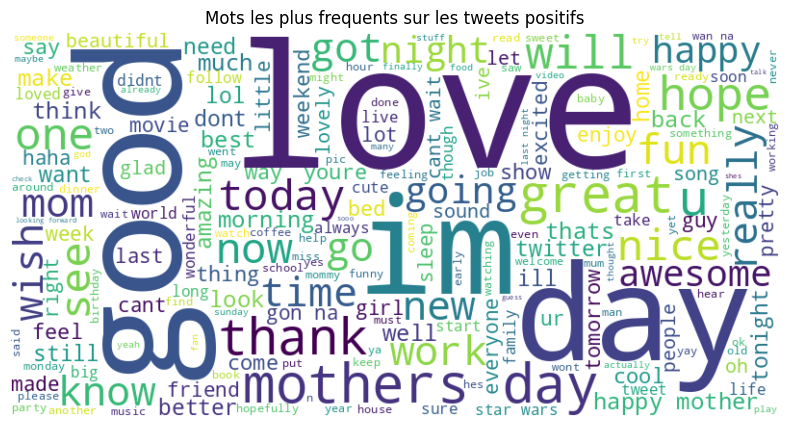

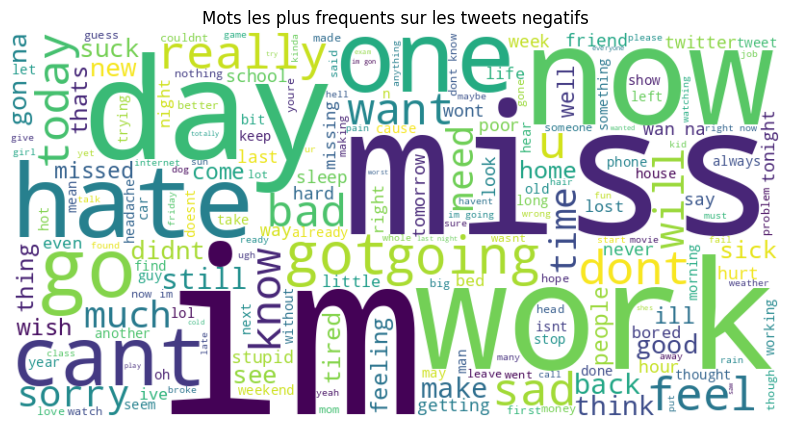

In [35]:
word_cloud_generator(df_selected['clean_text'],'Mots les plus frequents sur tout les tweets')
word_cloud_generator(tweet_positif['clean_text'],'Mots les plus frequents sur les tweets positifs')
word_cloud_generator(tweet_negatif['clean_text'],'Mots les plus frequents sur les tweets negatifs')

# 4-transformation du text en donnee numerique: Vectorisation

In [36]:
vectorizer=TfidfVectorizer()

In [37]:
text_vectorizer=vectorizer.fit_transform(df_selected['clean_text'].values)

In [38]:
features=text_vectorizer.toarray()
features

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

# 5-Modelisation

In [39]:
x_train,x_test,y_train,y_test=train_test_split(features,df_selected['sentiment'],test_size=0.2,random_state=42,stratify=df_selected['sentiment'])

In [40]:
model=LogisticRegression()

In [41]:
# entrainement du model
model.fit(x_train,y_train)

LogisticRegression()

In [42]:
y_pred=model.predict(x_test)
score=accuracy_score(y_test,y_pred)
print(score)

0.874732661167125


In [43]:
from sklearn.metrics import roc_curve, auc , f1_score, precision_score , recall_score

In [44]:
# predictions du model
y_train_pred=model.predict_proba(x_train)[:,1]
y_test_pred=model.predict_proba(x_test)[:,1]
fpr_train,tpr_train,seuil_train=roc_curve(y_train,y_train_pred)
roc_auc_train=auc(fpr_train,tpr_train)
fpr_test,tpr_test,seuil_test=roc_curve(y_test,y_test_pred)
roc_auc_test=auc(fpr_test,tpr_test)

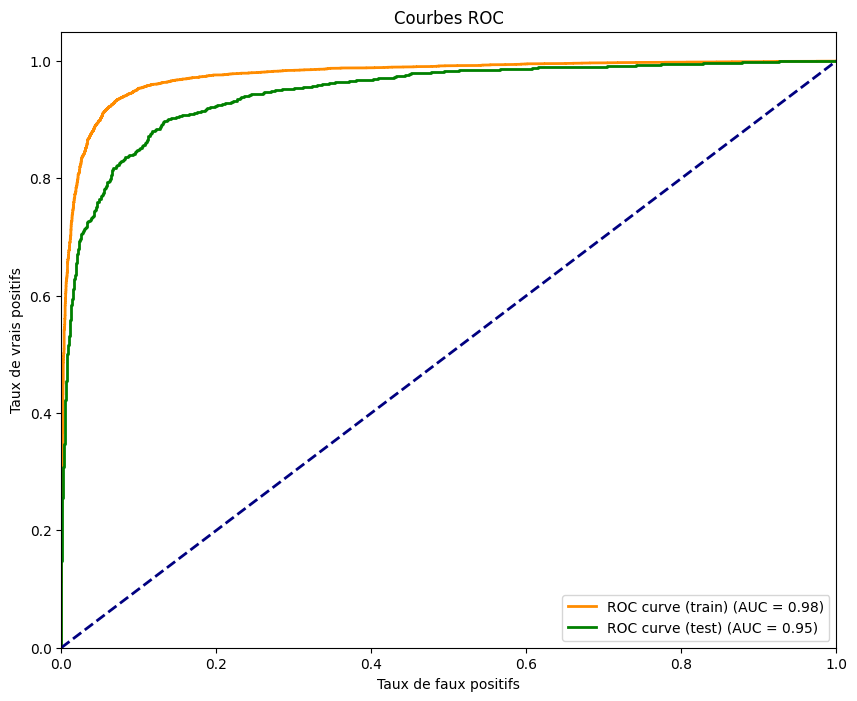

In [45]:
plt.figure(figsize=(10, 8))
plt.plot(fpr_train, tpr_train, color='darkorange', lw=2, label='ROC curve (train) (AUC = %0.2f)' % roc_auc_train)
plt.plot(fpr_test, tpr_test, color='green', lw=2, label='ROC curve (test) (AUC = %0.2f)' % roc_auc_test)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbes ROC')
plt.legend(loc="lower right")
plt.show()

In [46]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
# report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1556
           1       0.90      0.86      0.88      1717

    accuracy                           0.87      3273
   macro avg       0.87      0.88      0.87      3273
weighted avg       0.88      0.87      0.87      3273



<Axes: >

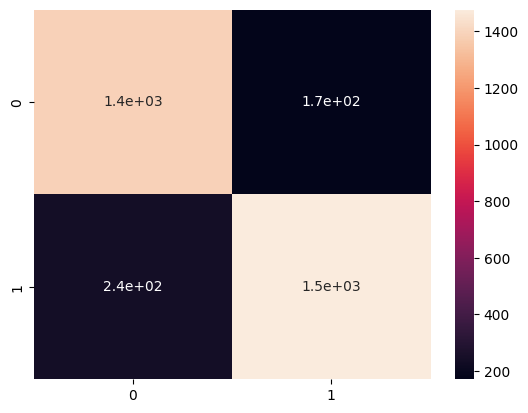

In [47]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

In [48]:
confusion_matrix(y_test,y_pred)

array([[1386,  170],
       [ 240, 1477]])

In [49]:
def sentiment_prediction(text):
    text_clean=clean_text(text)
    text_final=vectorizer.transform([text_clean])
    text_final=text_final.toarray()
    prediction=model.predict(text_final)
    return prediction[0]

In [50]:
test_text2='I\'m happy with what you did'


In [51]:
sentiment_prediction(test_text2)

1

In [52]:
sentiment_prediction('Thank you for walking me home last night. @@I had a great evening.')

1

In [53]:
sentiment_prediction('Gahh ! This weather sucksss')

0

In [54]:
sentiment_prediction('I am feeling very sad and alone right now. ')

0

In [55]:
sentiment_prediction('The weather is beautiful today!')

1

In [56]:
sentiment_prediction('I am not happy today!')

0

In [57]:
sentiment_prediction('I can\'t')

0

# jeu de test
## 10 Positive Sentences in English:
I am grateful for the beautiful day today.<br>
I am excited to spend time with my family and friends this weekend.<br>
I am feeling optimistic about the future.<br>
I am proud of my accomplishments.<br>
I am thankful for the good things in my life.<br>
I am looking forward to a new adventure.<br>
I am feeling happy and content.<br>
I am inspired by the people around me.<br>
I am grateful for the opportunity to learn and grow.<br>
I am confident in my abilities.<br>
## 10 Negative Sentences in English:
I am feeling stressed and overwhelmed.<br>
I am disappointed with the outcome.<br>
I am worried about the future.<br>
I am feeling frustrated and defeated.<br>
I am angry and upset.<br>
I am lonely and isolated.<br>
I am feeling insecure and self-conscious.<br>
I am bored and uninspired.<br>
I am critical of myself and others.<br>
I am pessimistic about the future.

In [58]:
# import joblib
# joblib.dump(model,"sentiment.joblib")
# joblib.dump(vectorizer,"vectorizer.joblib")